In [2]:
import pandas as pd
import numpy as np

In [4]:
data= pd.read_csv("C:\\Users\\Admin\\Downloads\\delivery_time.csv")

In [5]:
data.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
DT    21 non-null float64
ST    21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 408.0 bytes


Text(0,0.5,'DT')

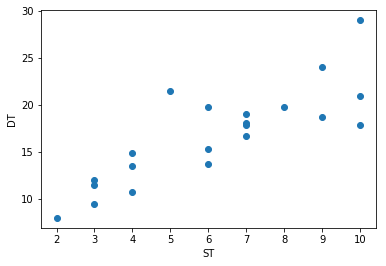

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
x=data.ST 
y=data.DT
plt.scatter(x,y)
plt.xlabel("ST")
plt.ylabel("DT")

In [43]:
data.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


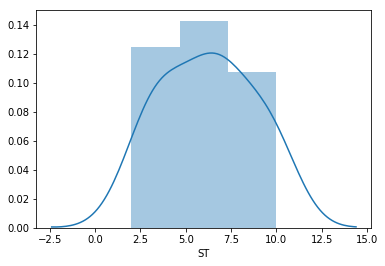

In [44]:
import seaborn as sns
sns.distplot(data['ST'])

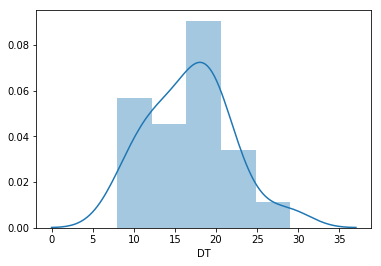

In [45]:
sns.distplot(data['DT'])

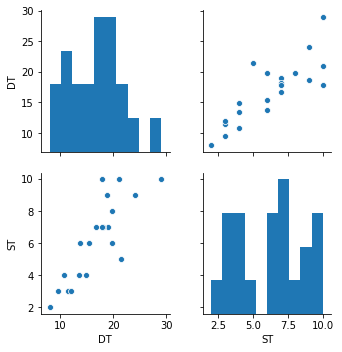

In [24]:

sns.pairplot(data)

In [34]:
import statsmodels.formula.api as smf
model= smf.ols("DT~ST",data= data).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        10:22:55   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
pred=model.predict(data.ST)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [37]:
errors=data.DT-pred
errors.mean()

-1.2688263138573218e-15

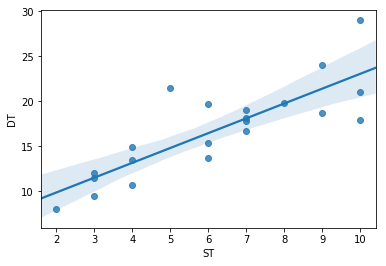

In [30]:
sns.regplot(x="ST",y="DT",data=data)

In [31]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [32]:
print(model.tvalues,'\n',model.pvalues)

(Intercept    3.823349
ST           6.387447
dtype: float64, '\n', Intercept    0.001147
ST           0.000004
dtype: float64)


In [33]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)